**YOUR NAME HERE**

Fall 2023

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [22]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [23]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

Mean Squared Error: 71.81095284569935


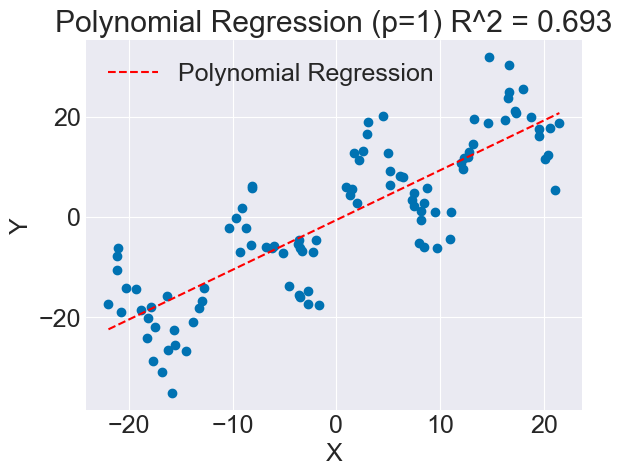

In [24]:
data_file = "data/poly_data.csv"
poly_data = data.Data(data_file)

poly_reg = linear_regression.LinearRegression(poly_data)

poly_reg.poly_regression("X", "Y", p=1)

poly_reg.scatter("X", "Y", "Polynomial Regression (p=1)")

mse = poly_reg.compute_mse()
print(f"Mean Squared Error: {mse}")

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

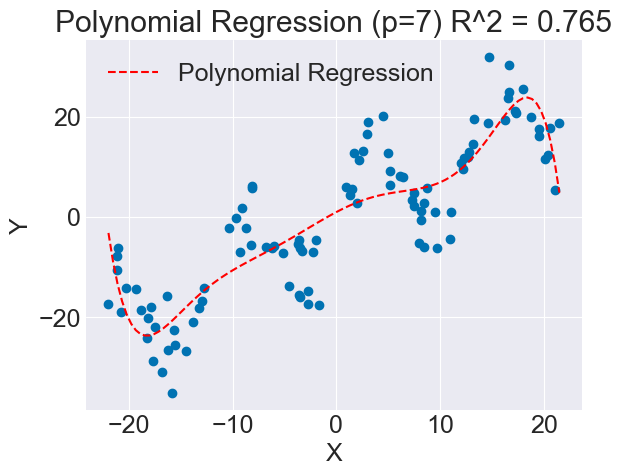

In [25]:
# Load the data
data_file = "data/poly_data.csv"
poly_data = data.Data(data_file)

# Create a LinearRegression object
poly_reg = linear_regression.LinearRegression(poly_data)

# Perform polynomial regression with p=7
poly_reg.poly_regression("X", "Y", p=7)

# Plot the results with scatter
poly_reg.scatter("X", "Y", "Polynomial Regression (p=7)")

### 3d. Questions

**Question 5:** Describe the `p=7` fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and 7. 

**Question 7:** Create and interpret a plot showing the MSE values as the polynomial degree goes from 1 to 7.

**Answer 5:** the p=7 fit is better compared to p=1, as p=7 is a non-linear fit. p=1 gives a linear fit to a non-linear dataset, and so giving some polynomial curve lets us get a better regression on the data. Additionally, we can see from the title of the graphs that p=7 has a greater R^2 value than p=1, indicating a better fit.

**Answer 6:** As the polynomial degree increases, the regression curve captures more data. However, this is up until p=6, as p=7 is overfitting the data. Additionally, the shape of the regression curve gains one more curve with each increase in the polynomial degree. 

**Answer 7:** As shown in the graph below, MSE decreases as polynomial degree increases. This demonstrates the overfitting that takes place. Code and graph below

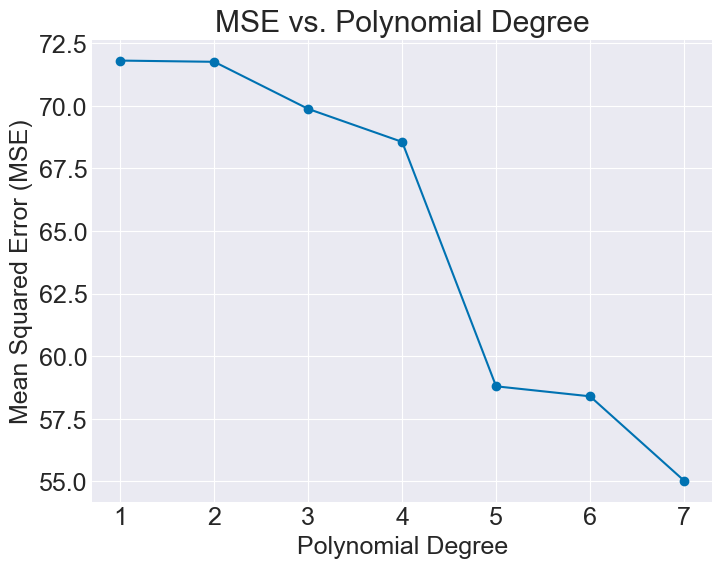

In [26]:
mse_values = []

for p in range(1, 8):
    poly_reg = linear_regression.LinearRegression(poly_data)
    poly_reg.poly_regression("X", "Y", p=p)
    mse = poly_reg.compute_mse()
    mse_values.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), mse_values, marker='o', linestyle='-')
plt.title("MSE vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [28]:
poly_filename = 'data/poly_data.csv'

fit_data = data.Data(poly_filename)
fit_data.limit_samples(0, 50)

val_data = data.Data(poly_filename)
val_data.limit_samples(50, 100)

print(fit_data)
print(val_data)

X, Y
2.147, 11.382
9.465, 1.034
4.52, 20.251
1.974, 2.89
-3.358, -6.809

X, Y
-3.65, -4.658
9.69, -6.107
-21.986, -17.271
-8.694, -2.22
-15.536, -25.608



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b. Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

Fit Set MSE: 59.59921097570395
Fit Set R^2: 0.6600388084752987


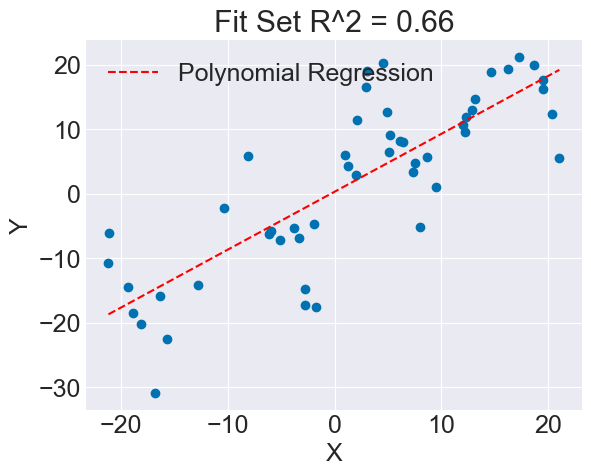

In [54]:
# Run linear regression on the fit set
fit_reg = linear_regression.LinearRegression(fit_data)
degree = 1
fit_reg.poly_regression('X', 'Y', p=degree)

# Create LinearRegression object for the validation data
val_reg = linear_regression.LinearRegression(val_data)

# Retrieve the slope and intercept coefficients from fit_reg
slope = fit_reg.get_fitted_slope()
intercept = fit_reg.get_fitted_intercept()

# Initialize val_reg using the coefficients from fit_reg
val_reg.initialize(['X'], 'Y', slope, intercept, p=degree)

# Scatter plot for fit set and regression curve fitted to it
fit_reg.scatter('X', 'Y', 'Fit Set')

# Calculate and print fit statistics (MSE, R2) for fit set
print("Fit Set MSE:", fit_reg.mse)
print("Fit Set R^2:", fit_reg.R2)



TypeError: unsupported format string passed to NoneType.__format__

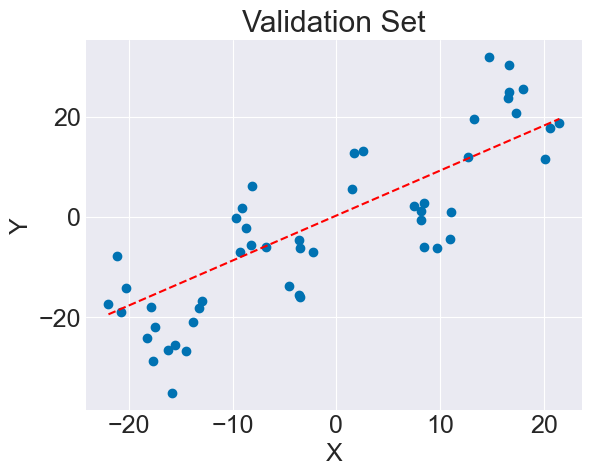

In [53]:
# # Scatter plot for validation set and regression curve using fitted coefficients
val_reg.scatter('X', 'Y', 'Validation Set')

# Calculate and print fit statistics (MSE, R2) for validation set
print("Validation Set MSE:", val_reg.mse)
print("Validation Set R^2:", val_reg.R2)


### 4c. Questions

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 8:** The fitted coefficients obtained for the fit set effectively generalize to the validation set, showing the model's ability to perform consistently across different datasets. This shows that the model captures the underlying patterns and relationships between the independent and dependent variables, providing a reliable predictions

**Answer 9:** For polynomial degrees less than 7, there is a noticeable decrease in generalization. This is reflected in the rising fit set errors (MSE) and the decreasing fit set R^2 values. As p decreases from 7 to 1, the fit set's MSE increases from 57.53 to 59.60, suggesting a deteriorating fit to the training data. Similarly, the fit set's R^2 decreases from 0.67 to 0.66, indicating a reduced ability to explain the variance in the training data. Meanwhile, the validation set's MSE rises from 74.85 (p = 7) to 79.82 (p = 5) and then drops to 88.58 (p = 1), signifying a worsening fit.

**Answer 10:** Based on the provided data, polynomial degrees 4, 5, and 6 demonstrate satisfactory generalization to the validation set. Their MSE values are only slightly higher compared to the MSE of the fit set. Additionally, they exhibit respectable R^2 values for the validation set (0.6765, 0.7174, and 0.7197), indicating a strong ability to explain the variability in the validation data. While higher polynomial degrees may offer better fit to the training data, they tend to overfit beyond p = 6, while lower degrees result in underfitting.

**Answer 11:** For polynomial degrees 7 and 8, the model's performance remains effective for pattern detection, as evident from the MSE values of 74.850 and 69.728, along with R^2 values of 0.735 and 0.753, respectively. However, as the degree continues to increase, the model's performance begins to deteriorate. For degree 9, the MSE decreases to 59.380, accompanied by an R^2 value of 0.790, indicating an improved fit. Yet, as the degree exceeds 9, the MSE values show a significant increase, reaching 132.019 for degree 10 and 182.302 for degree 12, while the R^2 values decline to 0.533 and 0.355, respectively. These trends reveal that higher polynomial degrees lead to overfitting, resulting in poor generalization on the validation set. Beyond a degree of 9, increasing the polynomial degree adversely affects the model's generalization due to overfitting.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.